## Esercitazione 1 Aprile 2025

 # Implementare le function corde, secanti, Newton per il calcolo degli zeri di equazioni non lineari.

In [1]:
import numpy as np

## Esercizio 1 

 Confrontare tutti i metodi implementati (bisezione, falsa posizione, corde, secanti, Newton) nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.

Calcolare l'ordine di ciascun metodo.


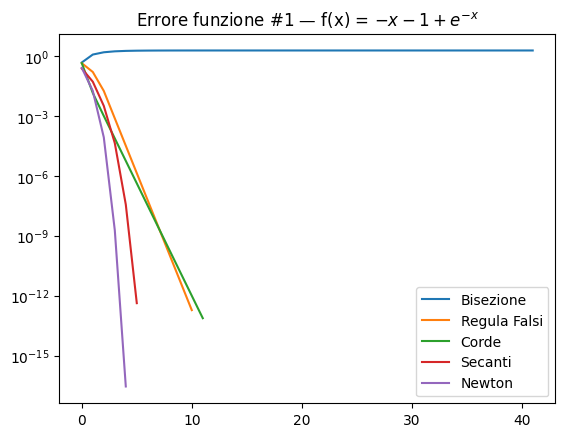

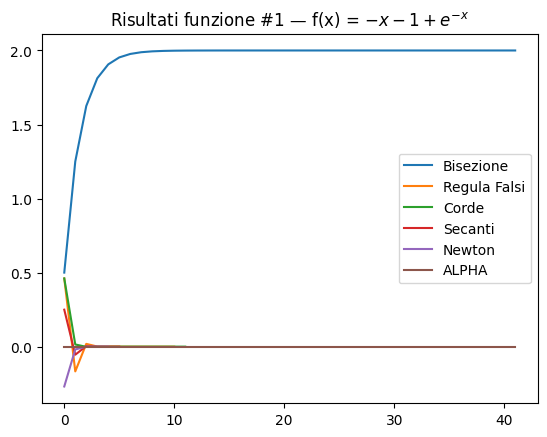

· Ordine di convergenza Bisezione: 1.0
· Ordine di convergenza Regula Falsi: 0.9999982554408614
· Ordine di convergenza Corde: 0.9999945641378206
· Ordine di convergenza Secanti: 1.6567591127852224
· Ordine di convergenza Newton: 2.002326546649064


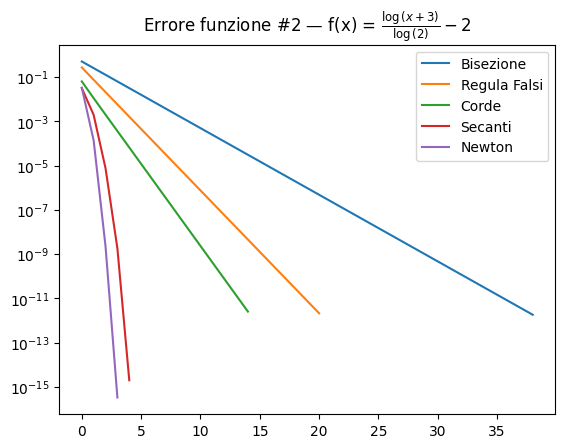

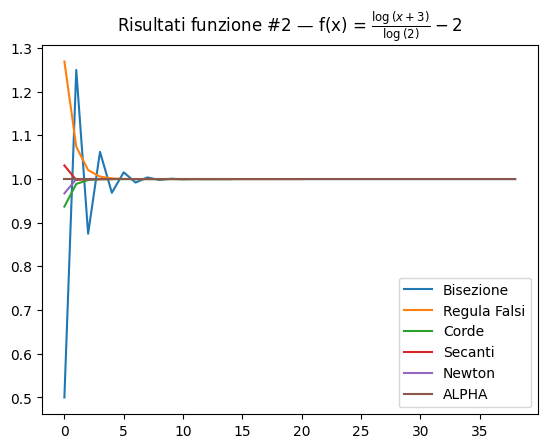

· Ordine di convergenza Bisezione: 1.0
· Ordine di convergenza Regula Falsi: 0.9998929113294419
· Ordine di convergenza Corde: 1.000007576933548
· Ordine di convergenza Secanti: 1.502539715285669
· Ordine di convergenza Newton: 2.0019773430542482


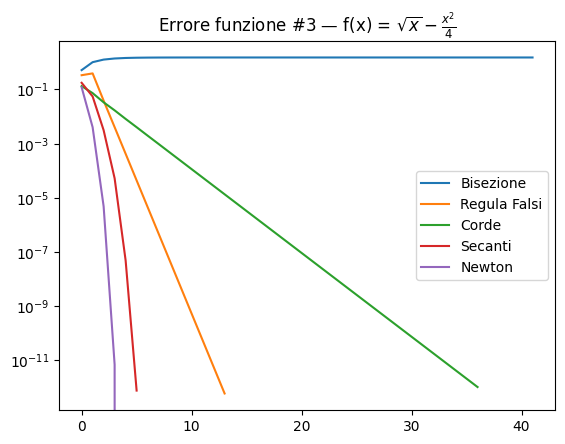

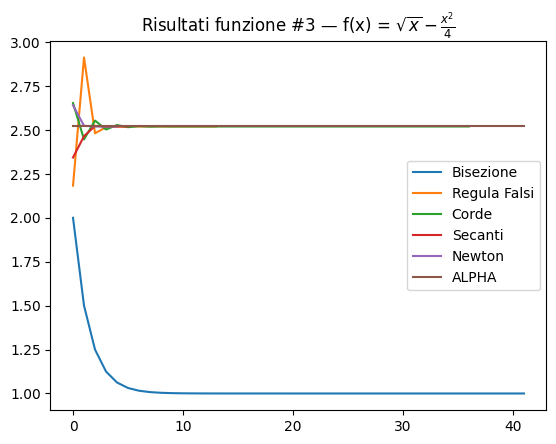

· Ordine di convergenza Bisezione: 1.0
· Ordine di convergenza Regula Falsi: 1.000016834831932
· Ordine di convergenza Corde: 1.000081580131163
· Ordine di convergenza Secanti: 1.697997636101595
· Ordine di convergenza Newton: 1.9999795076439078


In [14]:
from ricerca_zeri import bisezione, regula_falsi, corde, secanti, newton, stima_ordine
import sympy as sp
from sympy.printing import latex
import matplotlib.pyplot as plt
import math

general_tolx, general_tolf = 1e-12, 1e-12
general_maxit = 1000
x_sym = sp.Symbol("x")

class TestCase():
    def __init__(self, 
            f, a, b, symbolic_f, 
            expected: float = None, tolx = general_tolx, tolf = general_tolf, maxit = general_maxit, lower_guess = None, upper_guess = None):
        self.f = f
        self.a = a
        self.b = b
        self.symbolic_f = symbolic_f
        self.tolx = tolx
        self.tolf = tolf
        self.maxit = maxit
        self.expected = expected
        self.lower_guess = lower_guess
        self.upper_guess = upper_guess

tests = [
    # TestCase(lambda x: x**3 - 6*x**2 - 4*x + 24, -3, 8, symbolic_f=x_sym**3 - 6*x_sym**2 - 4*x_sym + 24, expected=(-2,2,6), lower_guess=-3, upper_guess=1),
    TestCase(lambda x: np.exp(-x) - x - 1, -1.0, 2.0, symbolic_f=sp.exp(-x_sym)-x_sym-1, expected=0.0, lower_guess=-1.0, upper_guess=1.0),
    TestCase(lambda x: np.log2(x + 3) - 2, -1.0, 2.0, symbolic_f=sp.log(x_sym + 3, 2) - 2, expected=1.0, lower_guess=.5, upper_guess=1.5),
    TestCase(lambda x: np.sqrt(x) - (x**2)/4, 1.0, 3.0, symbolic_f=sp.sqrt(x_sym) - (x_sym**2)/4, expected=math.pow(2, 4/3), lower_guess=2.0, upper_guess=4.0)
]

for idx, test in enumerate(tests):
    plt.title(f"Errore funzione #{idx + 1} — f(x) = ${latex(test.symbolic_f)}$")
    alpha = test.expected
    final_guess_bis, iterations_bis, attempts_bis = bisezione(test.f, test.a, test.b, test.tolx, test.tolf, test.maxit)
    error_bis = np.abs(np.array(attempts_bis) - alpha)
    
    final_guess_reg, iterations_reg, attempts_reg = regula_falsi(test.f, test.a, test.b, test.tolx, test.tolf, test.maxit)
    error_reg = np.abs(np.array(attempts_reg) - alpha)
    
    final_guess_cor, iterations_cor, attempts_cor = corde(test.f, test.a, test.b, test.lower_guess, test.tolx, test.tolf, test.maxit)
    error_cor = np.abs(np.array(attempts_cor) - alpha)
    
    final_guess_sec, iterations_sec, attempts_sec = secanti(test.f, test.lower_guess, test.upper_guess, test.tolx, test.tolf, test.maxit)
    error_sec = np.abs(np.array(attempts_sec) - alpha)

    final_guess_new, iterations_new, attempts_new = newton(test.symbolic_f, test.lower_guess, test.tolx, test.tolf, test.maxit)
    error_new = np.abs(np.array(attempts_new) - alpha)
    
    plt.semilogy(
        range(iterations_bis), error_bis,
        range(iterations_reg), error_reg,
        range(iterations_cor), error_cor,
        range(iterations_sec), error_sec,
        range(iterations_new), error_new,
    )
    
    plt.legend(['Bisezione',
                'Regula Falsi',
                'Corde',
                'Secanti',
                'Newton'])
    plt.show()

    x_range_target = np.arange(0.0, max(iterations_bis, iterations_reg, iterations_cor, iterations_sec, iterations_new), 1.0)
    plt.title(f"Risultati funzione #{idx + 1} — f(x) = ${latex(test.symbolic_f)}$")
    plt.plot(
        range(iterations_bis), attempts_bis,
        range(iterations_reg), attempts_reg,
        range(iterations_cor), attempts_cor,
        range(iterations_sec), attempts_sec,
        range(iterations_new), attempts_new,
        x_range_target, np.full_like(np.array(x_range_target), alpha)
    )
    plt.legend(['Bisezione',
                'Regula Falsi',
                'Corde',
                'Secanti',
                'Newton',
                'ALPHA'])
    plt.show()
    print(f'· Ordine di convergenza Bisezione: {stima_ordine(attempts_bis)}') 
    print(f'· Ordine di convergenza Regula Falsi: {stima_ordine(attempts_reg)}') 
    print(f'· Ordine di convergenza Corde: {stima_ordine(attempts_cor)}') 
    print(f'· Ordine di convergenza Secanti: {stima_ordine(attempts_sec)}') 
    print(f'· Ordine di convergenza Newton: {stima_ordine(attempts_new)}')
    print("======")
    

Calcolare gli zeri della funzione $f(x)=x^4-9x^2+4x+12$ definita sul'intervallo [-4,4] usando i metodi di Newton, corde e secandi, scegliendo opportunamente l'iterato iniziale per ogni metodo.

In [42]:
from ricerca_zeri import sign

new_test = TestCase(
    lambda x: x**4 - 9*x**2 + 4*x + 12, -4, 4, 
    symbolic_f=x_sym**4 - 9*x_sym**2 + 4*x_sym + 12, maxit=100)

# prima scelta: non avendo idea di un iterato iniziale, penso ai metodi a convergenza globale
# bisezione e regula falsi — applicabili solo se vengono rispettate le condizioni del Teorema dell'esistenza degli zeri

# Verifichiamolo queste condizioni:
def is_zero_compliant(a, b, f):
    return sign(f(a)) * sign(f(b)) < 0

print(is_zero_compliant(new_test.a, new_test.b, new_test.f)) # False! Quindi mi tocca cercare un iterato iniziale per gli altri metodi.

# Proviamo ad utilizzare al meglio il calcolo simbolico per capire gli zeri dalla fattorizzazione
sp.factor(new_test.symbolic_f)

False


(x - 2)**2*(x + 1)*(x + 3)

In [43]:
# Dal precedente comando osserviamo che il nostro polinomio è scomponibile in 3 fattori, e per
# la legge dell'annullamento del prodotto vedo che le radici sono 
# · x1 = 2 (m = 2)
# · x2 = -1 (m = 1)
# · x3 = -3 (m = 1)
# (dove 'm' indica la loro molteplicità)

# Per applicare il metodo delle corde, delle secanti e di newton mi basterà scegliere degli iterati iniziali prossimi alla soluzioni
# Per trovare x1 = 2, per esempio, posso scegliere x0 = 1 e x1 = 3
# utilizzerò solo x0 per metodo delle corde e metodo di newton, mentre sia x0 che x1 per quello delle secanti

x0, x1 = 2.5, 3
corde(new_test.f, new_test.a, new_test.b, x0, new_test.tolx, new_test.tolf, new_test.maxit)

(2.0026469233435753,
 101,
 [1.296875,
  0.0770566314458847,
  -2.9866489341308897,
  -2.8217588024876576,
  -0.9344196879702817,
  -1.2260280869619757,
  -0.18278516752239682,
  -2.925105624699887,
  -2.0507766476920644,
  2.040844649403202,
  2.0344516023526076,
  2.0299185446667263,
  2.0265080855915087,
  2.0238356640666924,
  2.021677978630575,
  2.0198952936089904,
  2.0183951692679063,
  2.0171137579981684,
  2.016005409301032,
  2.0150365433575175,
  2.01418186498813,
  2.0134219303572083,
  2.012741530565859,
  2.0121285871340397,
  2.0115733785832077,
  2.011067987155436,
  2.010605895465708,
  2.0101816874739287,
  2.009790823432816,
  2.0094294681963785,
  2.009094358615779,
  2.0087826999700207,
  2.008492084240669,
  2.00822042501348,
  2.0079659051723038,
  2.0077269345327897,
  2.0075021152705794,
  2.0072902135138175,
  2.007090135849558,
  2.006900909776289,
  2.006721667347364,
  2.00655163141153,
  2.0063901039800394,
  2.0062364563451993,
  2.0060901206491506,
  2.

# Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.

In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni effettuate, nit.


Implementare in altre due function `NewtonRaphson_Corde.py` e `NewtonRaphson_Sham.py` le varianti Corde e la variante di  Shamanskii


## Esercizio 1

Risolvere i seguenti cinque sistemi non lineari con tutti e tre i metodi e confrontare in scala logaritmica l'errore relativo tra due iterati successivi

    1) 
    2x0-cos(x1)=0

    sin(x0)+2x1=0

    2) 
    x0^2+x1^2-4=0

    x0^2-x1*2-1=0

    3) 
    x0^2+x1^2-2=0

    exp(x0-1)+x1^3-3
    
    4) 
    4x0^2+x_1^2^-4=0

    x0+x1-sin(x0-x1)=0

    5)

    x0+x1-3=0

    x0^2+x1^2-9=0
    
    
Per determinare l'iterato iniziale X 0 , servirsi del metodo grafico per individuare un 
iterato iniziale nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = fi (x1 ,x2 ) e z = h(x1 , x 2 ) e 
definire come iterato iniziale un vettore X 0 oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym


# Definizione variabili simboliche
x_sym, y_sym = symbols('x_sym y_sym')

# Definizione funzioni simboliche usando variabili simboliche 
       
f1_sym = lambda x_sym,y_sym: x_sym+y_sym-3   #[-1,1]
f2_sym= lambda x_sym,y_sym: x_sym**2+y_sym**2-9



def F_sym(f1_sym,f2_sym):
    return Matrix([[f1_sym(x_sym,y_sym)], [f2_sym(x_sym,y_sym)]])   

# Calcolo della matrice Jacobiana simbolicamente
J_sym = F_sym(f1_sym,f2_sym).jacobian(Matrix([x_sym, y_sym]))

# Converte la matrice jacobiana Simbolica in una funzione che può essere valutata numericamente mediante lambdify
J_numerical = lambdify([x_sym, y_sym], J_sym, np)

# Converte il vettore di funzioni Simbolico in una funzione che può essere valutata numericamente mediante lambdify
F_numerical = lambdify([x_sym, y_sym], F_sym(f1_sym,f2_sym), np)


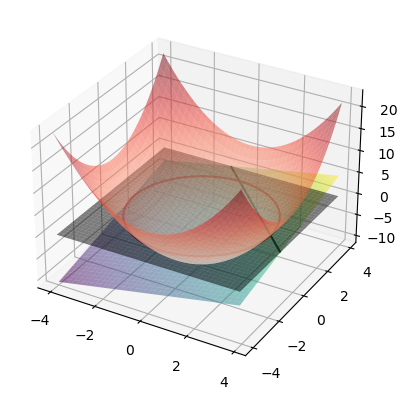

In [35]:

x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z=np.zeros_like(X)
superfici=F_numerical(X,Y).squeeze()
 
# Plotta la superficie direttamente
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plotta la superficie
ax.plot_surface(X, Y, superfici[0,:,:], cmap='viridis',alpha=0.5)
# Plotta la superficie
ax.plot_surface(X, Y, superfici[1,:,:], cmap='Reds',alpha=0.5)
ax.plot_surface(X, Y, Z, cmap='gray',alpha=0.5)
plt.contour(X, Y,superfici[0,:,:], levels=[0], colors='black')
plt.contour(X, Y,superfici[1,:,:], levels=[0], colors='red')
 
plt.show()


# Implementare il metodo di Newton Raphson per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

Calcolare il punto di minimo delle seguenti tre funzioni 
   $$\frac{1}{2}(0.001(x-1)^2+(x^2-y)^2)$$
   $$ (x - 2)^4 + (x - 2)^2 y^2+(y+1)^2$$
   $$x^4+(x+y)^2y^2+(exp(x)-1)^2$$
   $$100(y-x^2)^2+(1-x_sym)^2$$